                     name     avl
timestamp                        
2016-06-01 10:12:00  KLCC  1642.0
2016-06-01 10:15:00  KLCC  1609.0
2016-06-01 10:30:00  KLCC  1458.0
2016-06-01 10:45:00  KLCC  1357.0
2016-06-01 11:00:00  KLCC  1235.0
2016-06-01 11:15:00  KLCC  1076.0
2016-06-01 11:30:00  KLCC   944.0
2016-06-01 11:45:00  KLCC   791.0
2016-06-01 12:00:00  KLCC   637.0
2016-06-01 12:15:00  KLCC   529.0
2016-06-01 12:30:00  KLCC   437.0
2016-06-01 12:45:00  KLCC   355.0
2016-06-01 13:00:00  KLCC   220.0
2016-06-01 13:15:00  KLCC   133.0
2016-06-01 13:30:00  KLCC    26.0
2016-06-01 13:45:00  KLCC     0.1
2016-06-01 14:00:00  KLCC     0.1
2016-06-01 14:15:00  KLCC     0.1
2016-06-01 14:30:00  KLCC     0.1
2016-06-01 14:45:00  KLCC     5.0
2016-06-01 15:00:00  KLCC     0.1
2016-06-01 15:15:00  KLCC    43.0
2016-06-01 15:30:00  KLCC    62.0
2016-06-01 15:45:00  KLCC    82.0
2016-06-01 16:00:00  KLCC    84.0
2016-06-01 16:15:00  KLCC   184.0
2016-06-01 16:30:00  KLCC   302.0
2016-06-01 16:

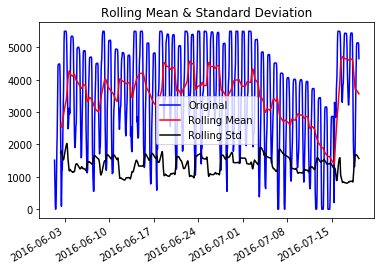

Results of Dickey-Fuller Test:
Test Statistic                   -3.148757
p-value                           0.023149
#Lags Used                       23.000000
Number of Observations Used    1126.000000
Critical Value (1%)              -3.436171
Critical Value (5%)              -2.864110
Critical Value (10%)             -2.568138
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                   -2.770297
p-value                           0.062643
#Lags Used                       21.000000
Number of Observations Used    1128.000000
Critical Value (1%)              -3.436160
Critical Value (5%)              -2.864106
Critical Value (10%)             -2.568136
dtype: float64
differentiated and log transformed train data -
timestamp
2016-06-01 11:00:00   -0.404971
2016-06-01 12:00:00   -0.725805
2016-06-01 13:00:00   -1.641879
2016-06-01 14:00:00   -4.270093
2016-06-01 15:00:00    3.563936
2016-06-01 16:00:00    1.687052
2016-06-01 17:00:00    1.198916
2016-06-01 18:00:00    0.636234
2016-06-01 19:00:00    0.210467
2016-06-01 20:00:00    0.165902
2016-06-01 21:00:00    0.253155
2016-06-01 22:00:00    0.274410
2016-06-01 23:00:00    0.117989
2016-06-02 00:00:00    0.016621
2016-06-02 01:00:00    0.001229
2016-06-02 02:00:00    0.001283
2016-06-02 03:00:00    0.000669
2016-06-02 04:00:00   -0.000167
2016-06-02 05:00:00

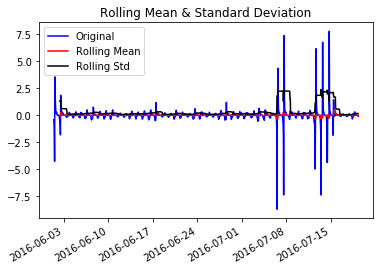

Results of Dickey-Fuller Test:
Test Statistic                -1.793904e+01
p-value                        2.865119e-30
#Lags Used                     2.100000e+01
Number of Observations Used    1.127000e+03
Critical Value (1%)           -3.436166e+00
Critical Value (5%)           -2.864108e+00
Critical Value (10%)          -2.568137e+00
dtype: float64
Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 1, 0) x (0, 1, 0, 24)
SARIMAX(0, 0, 0)x(0, 0, 0, 24) - AIC:8041.089412196143
SARIMAX(0, 0, 0)x(0, 0, 1, 24) - AIC:6591.931998858527
SARIMAX(0, 0, 0)x(0, 1, 0, 24) - AIC:3839.056930327536
SARIMAX(0, 0, 0)x(0, 1, 1, 24) - AIC:3739.4223599873876
SARIMAX(0, 0, 0)x(1, 0, 0, 24) - AIC:3837.5385212506726
SARIMAX(0, 0, 0)x(1, 0, 1, 24) - AIC:3834.499520124293
SARIMAX(0, 0, 0)x(1, 1, 0, 24) - AIC:3744.552299183724
SARIMAX(0, 0, 0)x(1, 1, 1, 24) - AIC:3560.2155987012297
SARIMAX(0, 0, 1)x(0, 0, 0, 24) - AIC:6546.469393152743
SARIMA

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from IPython.display import Image
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARMA, ARIMA
from sklearn.metrics import explained_variance_score

import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

#read the dataset into pandas dataframe
cols = ['name','avl','timestamp']
df = pd.read_csv('D:\\AI_HAckathon\\KLCC_parking\\parking-2-klcc-2016-2017.csv',na_values ='OPEN',header=None,names=cols,parse_dates=['timestamp'])
df = df.set_index('timestamp')

print(df)
# filling in NaN by interpolating
df.interpolate(inplace=True,method='time')

# groups the data in buckets by Hour and taking mean
df = df['avl'].resample('H').mean()

#creating train and test dataset
train=df[0:1150]
test=df[1150:1250]

#plot train dataset
plt.figure(figsize=(12,8))
plt.plot(train.index, train, label='Train')
plt.title("Hourly Availability of Train dataset")
plt.gcf().autofmt_xdate()
plt.show()

#method to perform dickey-fuller test for stationary timeseries
def evaluate_stationarity(timeseries, t):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=t).mean()
    rolstd = timeseries.rolling(window=t).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.gcf().autofmt_xdate()
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
    'p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    return
    
#checking the stationarity of the train dataset
evaluate_stationarity(train, 24)


#log transform the Train data, to make the series stationary
train_log = np.log(train)

#checking the stationarity of the log-transformed train dataset
evaluate_stationarity(train_log, 24)


#eliminating Trend and Seasonality by first order differenting
data_diff = train_log - train_log.shift()
data_diff.dropna(inplace=True)
print("differentiated and log transformed train data -")
print(data_diff)
evaluate_stationarity(data_diff,24)

#grid search for params of SARIMAX
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_log,order=param,seasonal_order=seasonal_param,enforce_stationarity=False,enforce_invertibility=False)
            results_sarimax = mod.fit()
            print('SARIMAX{}x{} - AIC:{}'.format(param, seasonal_param, results_sarimax.aic))
        except:
            continue
            
            

                                 Statespace Model Results                                 
Dep. Variable:                                avl   No. Observations:                 1150
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 24)   Log Likelihood               -1063.738
Date:                            Fri, 28 Sep 2018   AIC                           2137.476
Time:                                    01:51:08   BIC                           2162.491
Sample:                                06-01-2016   HQIC                          2146.939
                                     - 07-19-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8035      0.005    146.421      0.000       0.793       0.814
ma.L1          0.3123      0.014   

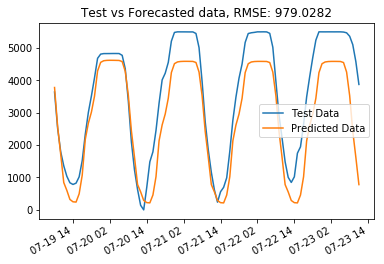

In [6]:
#train the model with params as found with lowest aic
mod = sm.tsa.statespace.SARIMAX(train_log, 
                                order=(1,0,1), 
                                seasonal_order=(1,1,1,24),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMAX = mod.fit(disp=0)
print(results_SARIMAX.summary())
print(results_SARIMAX.aic)

# Forecasting future hour's value, for the same number of timesteps as the size of the test dataset
future_forecast_ar = results_SARIMAX.forecast(steps=test.size)
future_forecast = pd.Series(future_forecast_ar,copy=True,index = test.index)

print("future forecast in series log scale -")
print(future_forecast)
future_forecast_scale = np.exp(future_forecast)
print("future forecast original scale -")
print(future_forecast_scale)

plt.title('Test vs Forecasted data, RMSE: %.4f'% np.sqrt(sum((future_forecast_scale-test)**2)/len(test)))
plt.plot(test,label='Test Data')
plt.plot(future_forecast_scale, label='Predicted Data')
plt.legend(loc='best')
plt.gcf().autofmt_xdate()
plt.show()

In [7]:
#rolling over prediction, fitting the model on data in original scale
#the model makes a forecast of only 1 hour in future, then the model is retrained with taking the next hour's actual
#value into consideration.

train_1 = train.values
test_1 = test.values

history = [x for x in train_1]
predictions = list()
for t in range(len(test_1)):
    model = sm.tsa.statespace.SARIMAX(history, 
                                order=(1,0,1), 
                                seasonal_order=(1,1,1,24),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    print(model_fit.aic)
    yhat = output[0]
    predictions.append(yhat)
    obs = test_1[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predictions_se = pd.Series(predictions, copy=True)    
print("predictions_series-")
print(predictions_se)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_se-test_1)**2)/len(test_1)))
plt.plot(test_1,label='Test Data')
plt.plot(predictions_se, label='Predicted Data')
plt.legend(loc='best')
plt.gcf().autofmt_xdate()
plt.show()


14783.93273693669
predicted=3887.673378, expected=3640.750000
14797.910229068224
predicted=2716.992288, expected=2522.125000
14811.314479533903
predicted=1893.783232, expected=1798.250000
14823.943307934911
predicted=1379.231991, expected=1359.000000
14836.34418257575
predicted=1030.040831, expected=1037.500000
14848.734941342147
predicted=873.770862, expected=837.000000
14861.134483420792
predicted=809.282019, expected=785.250000
14873.537144198128
predicted=800.233174, expected=825.250000
14885.94013267862
predicted=1110.101230, expected=1019.000000
14898.562292858918
predicted=1538.748231, expected=1519.000000
14910.932601607165
predicted=2079.164536, expected=2335.250000
14925.025502867225
predicted=2926.851731, expected=3011.500000
14937.59926140495
predicted=3391.660320, expected=3521.250000
14950.45200363056
predicted=4057.465784, expected=4080.250000
14962.823930199305
predicted=4785.810378, expected=4681.500000
14975.493590673595
predicted=4840.076456, expected=4811.000000
149